### Generación de datos de entrenamiento
#### Primero escribiremos una función para generar una muestra aleatoria.

In [1]:
import numpy as np
import pylab as pl

def f(size):
    x = np.linspace(0, 4.5, size)
    y = 2 * np.sin(x * 1.5)
    return (x,y)

def sample(size):
    x = np.linspace(0, 4.5, size)
    y = 2 * np.sin(x * 1.5) + pl.randn(x.size)
    return (x,y)

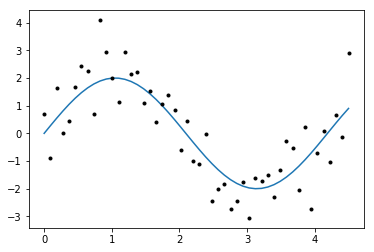

In [2]:
pl.clf()
f_x, f_y = f(50)
pl.plot(f_x, f_y)
x, y = sample(50)
pl.plot(x, y, 'k.')

### Ajuste del modelo
#### Utilizaremos la regresión de mínimos cuadrados (LSR) para ajustar un polinomio a los datos. En realidad, utilizaremos la regresión lineal multivariada, sobre un conjunto de datos construido de la siguiente manera:

In [3]:
x1 = np.array([1,2,3])

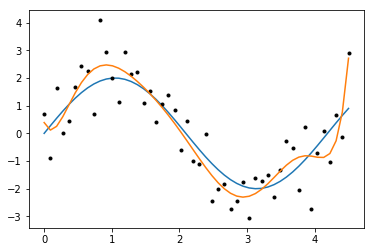

In [4]:
from sklearn.linear_model import LinearRegression

def fit_polynomial(x, y, degree):
    model = LinearRegression()
    model.fit(np.vander(x, degree + 1), y)
    return model

def apply_polynomial(model, x):
    degree = model.coef_.size - 1
    y = model.predict(np.vander(x, degree + 1))
    return y

model = fit_polynomial(x, y, 8)
p_y = apply_polynomial(model, x)
pl.plot(f_x, f_y)
pl.plot(x, y, 'k.')
pl.plot(x, p_y)

### Promedio de modelos
#### El siguiente código genera un conjunto de muestras del mismo tamaño y ajusta un polinomio a cada muestra. Luego se calcula el modelo promedio. Todos los modelos, incluido el modelo promedio, se trazan.

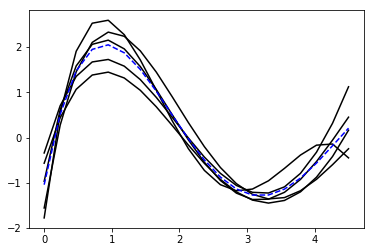

In [5]:
degree = 4
n_samples = 20
n_models = 5
avg_y = np.zeros(n_samples)
for i in range(n_models):
    (x,y) = sample(n_samples)
    model = fit_polynomial(x, y, degree)
    p_y = apply_polynomial(model, x)
    avg_y = avg_y + p_y
    pl.plot(x, p_y, 'k-')
avg_y = avg_y / n_models
pl.plot(x, avg_y, 'b--')

### Cálculo de sesgo y varianza
#### Al igual que en el ejemplo anterior, generamos varias muestras y ajustamos un polinomio a cada una. Calculamos el sesgo y la varianza entre los modelos para diferentes grados polinómicos. El sesgo, la varianza y el error se grafican con diferentes valores de grado.

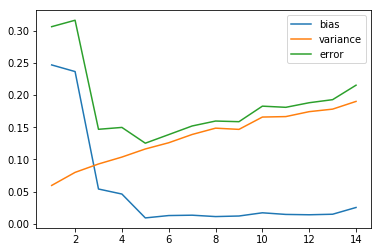

In [6]:
from numpy.linalg import norm
n_samples = 20
f_x, f_y = f(n_samples)
n_models = 100
max_degree = 15
var_vals =[]
bias_vals = []
error_vals = []
for degree in range(1, max_degree):
    avg_y = np.zeros(n_samples)
    models = []
    for i in range(n_models):
        (x,y) = sample(n_samples)
        model = fit_polynomial(x, y, degree)
        p_y = apply_polynomial(model, x)
        avg_y = avg_y + p_y
        models.append(p_y)
    avg_y = avg_y / n_models
    bias_2 = norm(avg_y - f_y)/f_y.size
    bias_vals.append(bias_2)
    variance = 0
    for p_y in models:
        variance += norm(avg_y - p_y)
    variance /= f_y.size * n_models
    var_vals.append(variance)
    error_vals.append(variance + bias_2)
pl.plot(range(1, max_degree), bias_vals, label='bias')
pl.plot(range(1, max_degree), var_vals, label='variance')
pl.plot(range(1, max_degree), error_vals, label='error')
pl.legend()

### Cross Validation
#### No podemos calcular exactamente el error, sin embargo, podemos aproximarlo mediante validación cruzada. Generamos muestras, una muestra de entrenamiento y una muestra de validación. La muestra de validación se usa para calcular una estimación del error.

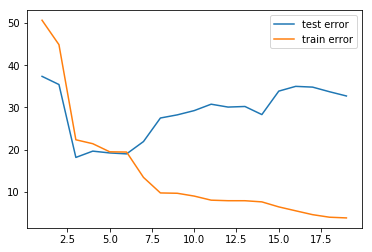

In [7]:
n_samples = 20
train_x, train_y = sample(n_samples)
test_x, test_y = sample(n_samples)
max_degree = 20
test_error_vals = []
train_error_vals = []
for degree in range(1, max_degree):
    model = fit_polynomial(train_x, train_y, degree)
    p_y = apply_polynomial(model, train_x)
    train_error_vals.append(pl.norm(train_y - p_y)**2)
    p_y = apply_polynomial(model, test_x)
    test_error_vals.append(pl.norm(test_y - p_y)**2)
pl.plot(range(1, max_degree), test_error_vals, label='test error')
pl.plot(range(1, max_degree), train_error_vals, label='train error')
pl.legend()

### Regularización
#### Otra forma de lidiar con la complejidad del modelo es mediante la regularización. Un regularizador es un término que penaliza la complejidad del modelo y es parte de la función de pérdida. la siguiente parte del código muestra cómo la norma de los coeficientes del modelo de regresión lineal aumentó cuando aumenta la complejidad del modelo (grado polinómico).

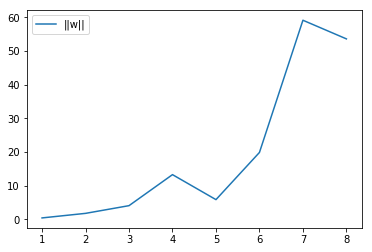

In [8]:
n_samples = 20
train_x, train_y = sample(n_samples)
max_degree = 9
w_norm = []
for degree in range(1, max_degree):
    model = fit_polynomial(train_x, train_y, degree)
    w_norm.append(pl.norm(model.coef_))
pl.plot(range(1, max_degree), w_norm, label='||w||')
pl.legend()

### Otro

In [9]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import seaborn as sn
from matplotlib.pylab import rcParams
from sklearn import metrics
from sklearn.model_selection import train_test_split
rcParams['figure.figsize'] = 8, 6
%matplotlib inline

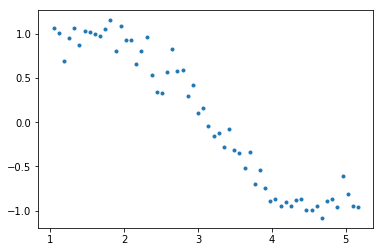

In [10]:
np.random.seed(10)
x = np.array([i*np.pi/180 for i in range(60,300,4)])
y = np.sin(x) + np.random.normal(0,0.15,len(x))
curve = pd.DataFrame(np.column_stack([x,y]),columns=['x','y'])
plt.plot(curve['x'],curve['y'],'.')

In [11]:
def fit_poly( degree ):
    p = np.polyfit( curve.x, curve.y, deg = degree )
    curve['fit'] = np.polyval( p, curve.x )
    sn.regplot( curve.x, curve.y, fit_reg = False )
    return plt.plot( curve.x, curve.fit, label='fit' )

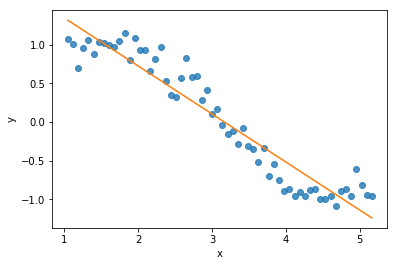

In [12]:
fit_poly(1)

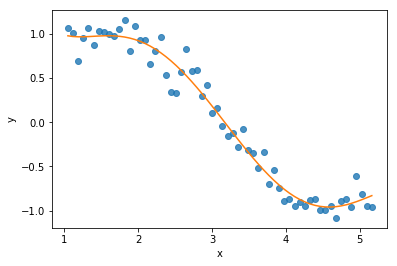

In [13]:
fit_poly(5)

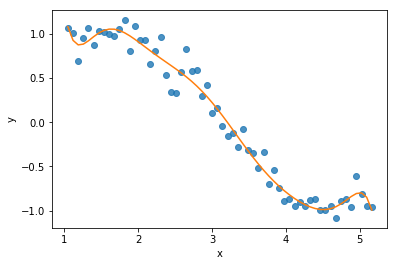

In [14]:
fit_poly(10)

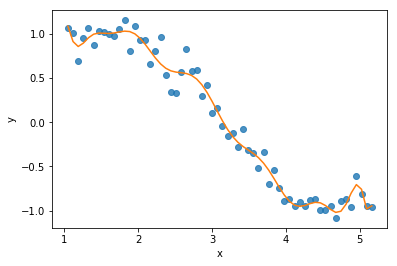

In [15]:
fit_poly(15)

In [16]:
def get_rmse( y, y_fit ):
    return np.sqrt( metrics.mean_squared_error( y, y_fit ) )

In [17]:
train_X, test_X, train_y, test_y = train_test_split( curve.x,
                                                  curve.y,
                                                  test_size = 0.40,
                                                  random_state = 100 )

In [18]:
rmse_df = pd.DataFrame( columns = ["degree", "rmse_train", "rmse_test"] )

In [19]:
for i in range( 1, 15 ):
    p = np.polyfit( train_X, train_y, deg = i )
    rmse_df.loc[i-1] = [ i,
                      get_rmse( train_y, np.polyval( p, train_X ) ),
                      get_rmse( test_y, np.polyval( p, test_X ) ) ]

In [20]:
rmse_df

,degree,rmse_train,rmse_test
0,1.0,0.231569,0.237707
1,2.0,0.229154,0.244414
2,3.0,0.115409,0.165920
3,4.0,0.113938,0.164451
4,5.0,0.110525,0.159416
5,6.0,0.105360,0.166479
6,7.0,0.104923,0.161330
7,8.0,0.104414,0.157364
8,9.0,0.100549,0.160113
9,10.0,0.100393,0.158239


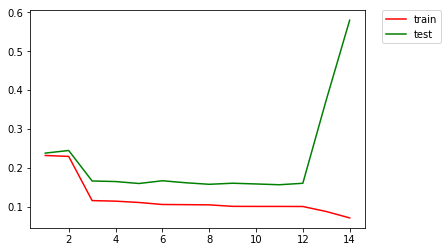

In [21]:
plt.plot( rmse_df.degree,
       rmse_df.rmse_train,
       label='train',
       color = 'r' )

plt.plot( rmse_df.degree,
       rmse_df.rmse_test,
       label='test',
       color = 'g' )

plt.legend(bbox_to_anchor=(1.05, 1),
         loc=2,
         borderaxespad=0.)